### Understanding data

In [158]:
import pandas as pd

In [126]:
df = pd.read_csv('regression_balance.csv')

In [127]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [128]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


#### Visualizing data

In [129]:
from matplotlib import pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

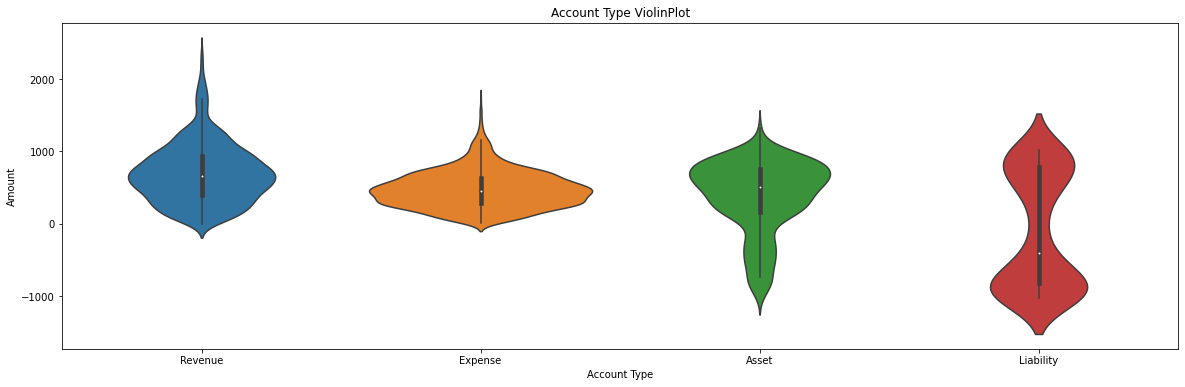

In [130]:
#spread of transaction across each account type
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df).set_title('Account Type ViolinPlot')
plt.show

#### Correlation

In [131]:
pd.get_dummies(df['Account Description'])
corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)
    

In [132]:
corrdf.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


<AxesSubplot:>

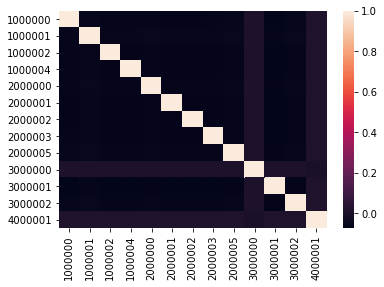

In [133]:
sns.heatmap(corrdf.corr())

### Data Prep

In [134]:
monthmap ={
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
}

df['Period'] = df['Month'].apply(lambda x: monthmap[x])
df['Day'] = 1
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])

In [135]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [136]:
import numpy as np

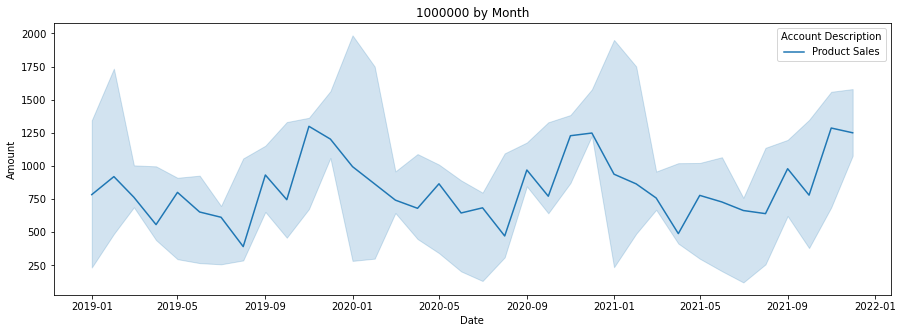

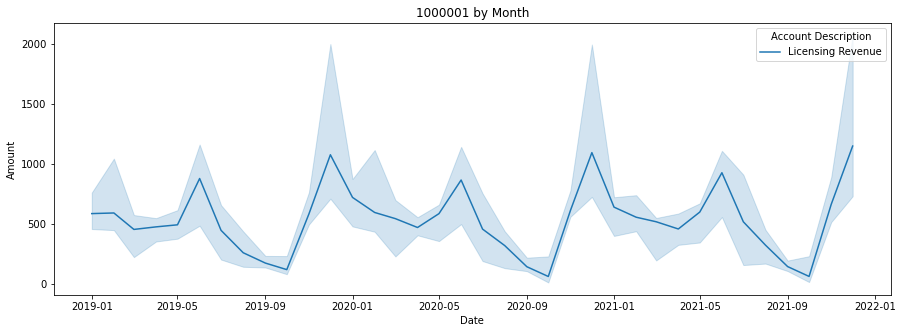

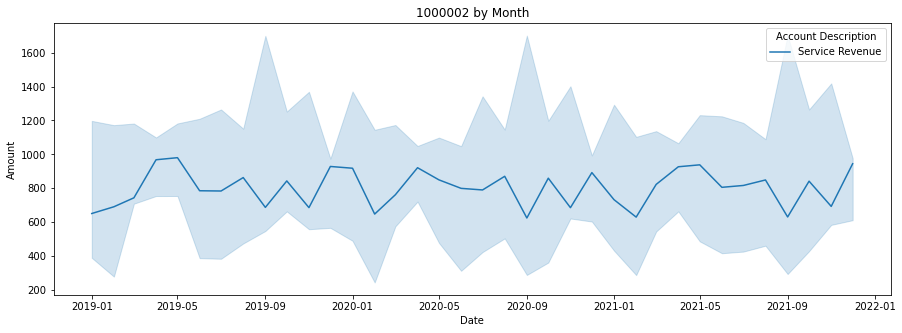

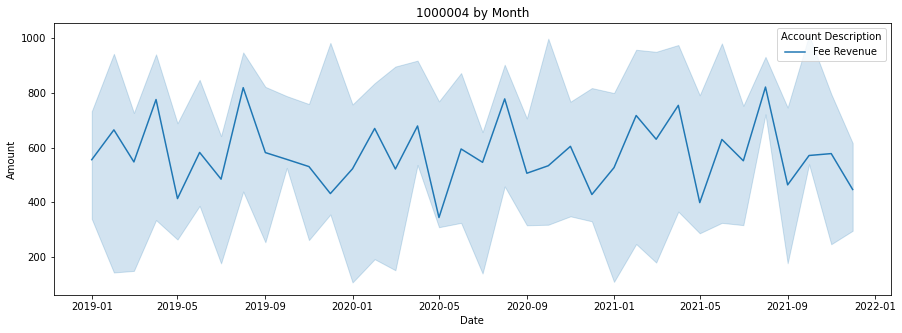

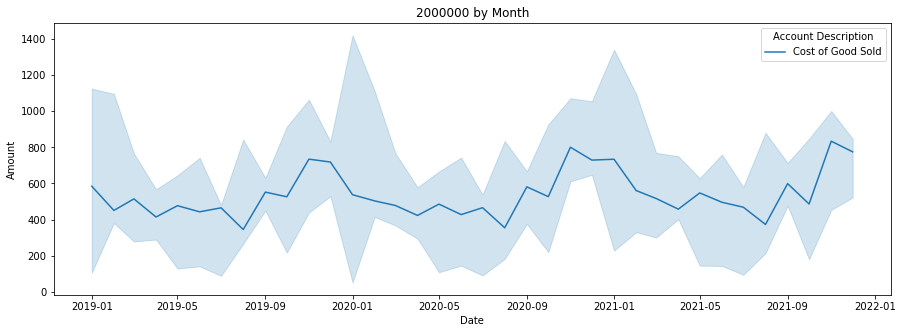

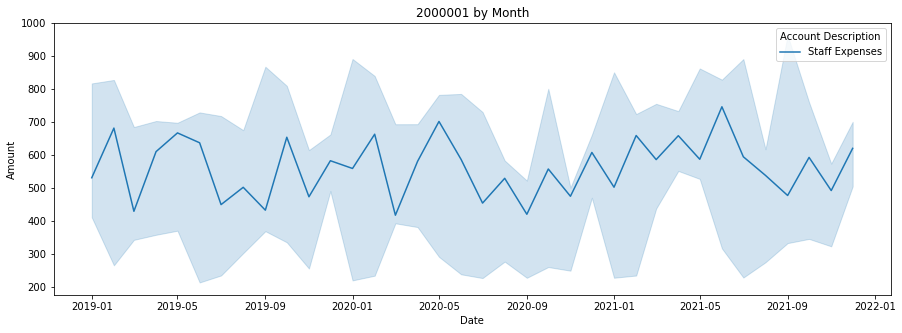

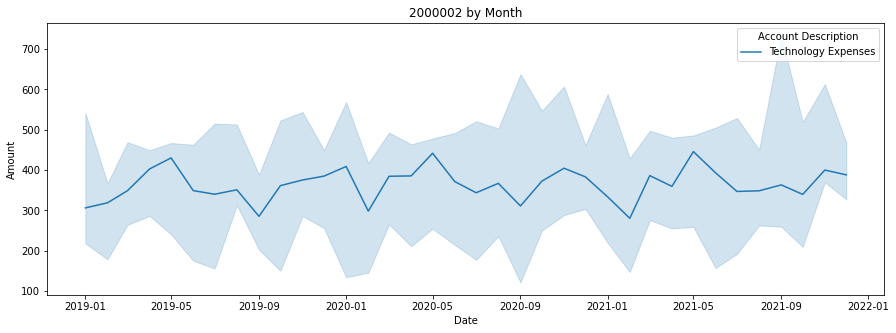

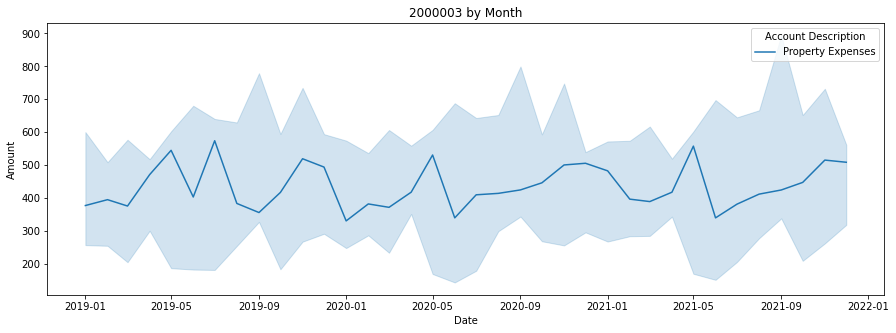

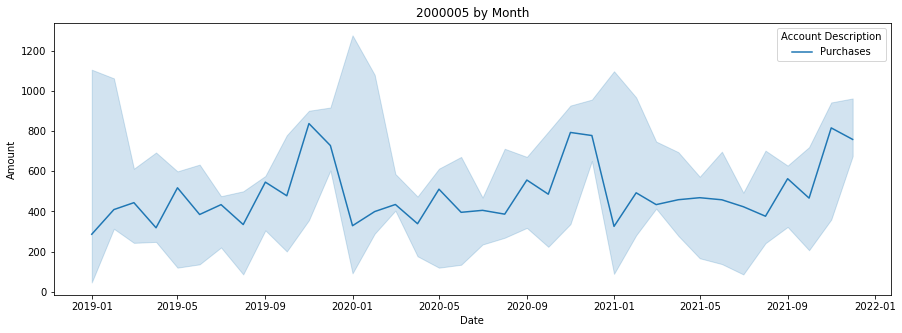

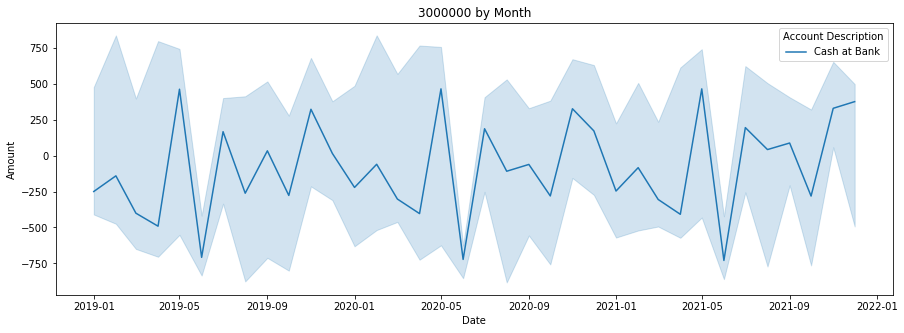

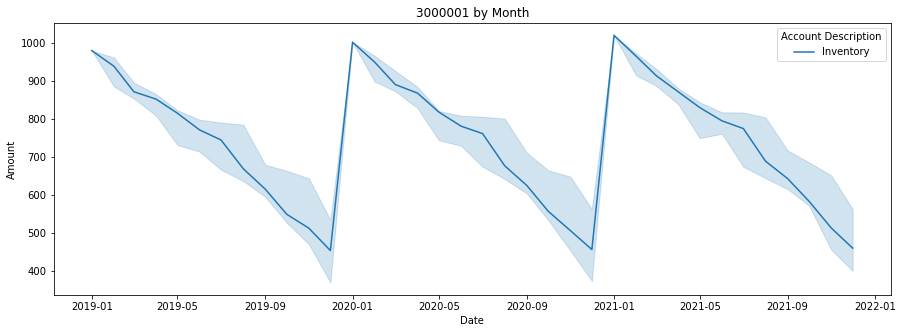

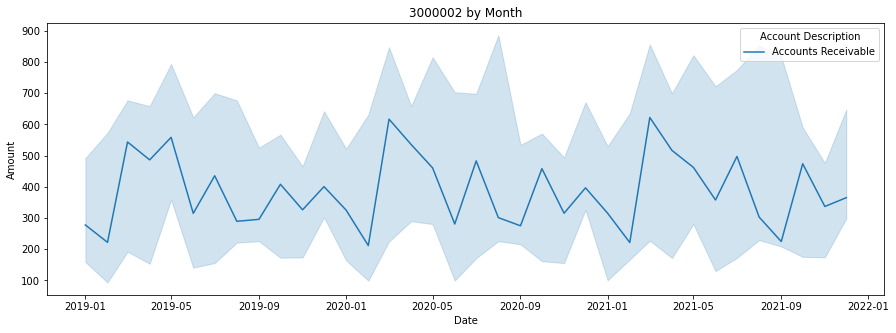

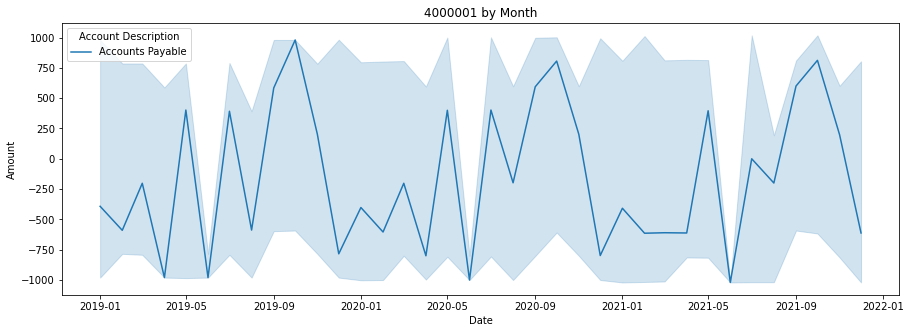

In [137]:
for account in df['Account'].unique():
    plt.figure(figsize=(15,5))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title(('{} by Month'.format(account)))
    plt.show()

In [91]:
#df = df[df['Account']!=3000001]

#### Convert fields to correct data types

In [139]:
df['Account'] = df['Account'].astype(str)
df['Year'] = df['Year'].astype(str)
df.dtypes

Year                           object
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

#### Drop analysis fields

In [140]:
df.drop(['Period','Day','Date'], axis=1, inplace=True)

In [141]:
len(df['Account'].unique())

13

In [142]:
len(df['Account Description'].unique())

13

In [143]:
df['Account Desc'] = df['Account'] + df['Account Description']
len(df['Account Desc'].unique())

13

In [144]:
df.drop(['Account Description','Account Desc'], axis=1, inplace=True)

In [145]:
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,1000000,Revenue,1344.051
1,2019,Jan,CC100,1000001,Revenue,480.968
2,2019,Jan,CC100,1000002,Revenue,650.820
3,2019,Jan,CC100,1000004,Revenue,339.360
4,2019,Jan,CC100,2000000,Expense,1125.328


#### One Hot Encoding

In [146]:
df = pd.get_dummies(df)

In [147]:
df.head()

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_2000003,Account_2000005,Account_3000000,Account_3000001,Account_3000002,Account_4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [148]:
df.dtypes

Amount                    float64
Year_2019                   uint8
Year_2020                   uint8
Year_2021                   uint8
Month_Apr                   uint8
Month_Aug                   uint8
Month_Dec                   uint8
Month_Feb                   uint8
Month_Jan                   uint8
Month_Jul                   uint8
Month_Jun                   uint8
Month_Mar                   uint8
Month_May                   uint8
Month_Nov                   uint8
Month_Oct                   uint8
Month_Sep                   uint8
Cost Centre_CC100           uint8
Cost Centre_CC101           uint8
Cost Centre_CC102           uint8
Cost Centre_CC200           uint8
Cost Centre_CC201           uint8
Cost Centre_CC202           uint8
Cost Centre_CC300           uint8
Cost Centre_CC301           uint8
Cost Centre_CC302           uint8
Account_1000000             uint8
Account_1000001             uint8
Account_1000002             uint8
Account_1000004             uint8
Account_200000

### Modelling

In [149]:
X = df.drop('Amount', axis=1)
y = df['Amount']

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [151]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [152]:
pipelines ={
    'rf': make_pipeline(RandomForestRegressor(random_state=42)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=42)),
    'ridge': make_pipeline(Ridge(random_state=42)),
    'lasso': make_pipeline(Lasso(random_state=42)),
    'enet': make_pipeline(ElasticNet(random_state=42)),
}

In [167]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [176]:
hypergrid ={
    'rf': { 'randomforestregressor__n_estimators':[100,500], 'randomforestregressor__min_samples_split':[2,4,6], 'randomforestregressor__min_samples_leaf':[1,2,3] },
    'gb': { 'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99] },
    'ridge': {'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99] },
    'lasso': {'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99] },
    'enet': {'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99] },
}

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        model.fit(X_train, y_train)
        fit_models[algo] = model
    except NotFittedError as e:
            print(repr(e))

In [178]:
fit_models['rf'].predict(X_test)

array([437.86975 , 979.524778, 564.193848, ..., 161.29032 , 246.428556,
       818.019836])

### Evaluation

In [179]:
from sklearn.metrics import r2_score, mean_absolute_error

for algo, model in fit_models.items():
    y_pred = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred)))

rf scores - R2:0.8032748388049274 MAE:133.24334260759503
gb scores - R2:0.4673187074000865 MAE:251.25833996223488
ridge scores - R2:0.3389318044441414 MAE:284.9517792902763
lasso scores - R2:0.33865100999339914 MAE:285.0879900798458
enet scores - R2:0.34068741498280697 MAE:284.77273804969604
